In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split


In [ ]:
#Loading and Processing the Data Set

In [ ]:
breast_cancer_dataset=sklearn.datasets.load_breast_cancer()

In [ ]:
DataFrame = pd.DataFrame(breast_cancer_dataset.data , columns = breast_cancer_dataset.feature_names)
DataFrame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
DataFrame['label']=breast_cancer_dataset.target   #adding target column to dataframe

In [ ]:
DataFrame.shape       #tells about total number of rows and columns in datarframe

(569, 31)

In [ ]:
DataFrame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [ ]:
X = DataFrame.drop(columns='label', axis=1)            #Seperating Target from Features into different dataframes
Y = DataFrame['label']
print(X)
print(Y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)        #using 70/30 ratio of test and training data

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (398, 30) (171, 30)


**Standardize the Data Set**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)


[[-0.95966659 -2.19010894 -0.97007291 ... -1.05111886 -1.35910506
  -0.38826985]
 [-0.22591441 -1.28489628 -0.23938198 ... -0.33868617 -0.26080331
  -0.5957019 ]
 [ 0.16167243  0.73772353  0.21568993 ... -0.04607432 -1.0734786
  -0.22133905]
 ...
 [-0.46852601 -1.48580383 -0.53818391 ... -1.35090181 -1.03607513
  -0.75551761]
 [-0.50403015 -1.61221756 -0.53346146 ... -0.100637    0.3750556
  -0.44683246]
 [ 1.01377174  1.18920117  1.06186609 ...  0.91422882 -1.24009403
   0.48798003]]


**Creating Neural Network Using TensorFlow and Keras**

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [ ]:

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),           # Input Layer
                          keras.layers.Dense(40, activation='relu'),          # Hidden  Layer with 40 neurons
                          keras.layers.Dense(2, activation='sigmoid')])      # Output layer should have equal neurons to classes in DataFrame

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)      # trained with standarize X-training data

Epoch 1/10
12/12 [==============================] - 1s 13ms/step - loss: 1.2499 - accuracy: 0.3352 - val_loss: 1.0885 - val_accuracy: 0.3750
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 0.7096 - accuracy: 0.5475 - val_loss: 0.5519 - val_accuracy: 0.7000
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 0.4159 - accuracy: 0.8631 - val_loss: 0.3240 - val_accuracy: 0.9250
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.2812 - accuracy: 0.9385 - val_loss: 0.2333 - val_accuracy: 0.9500
Epoch 5/10
12/12 [==============================] - 0s 5ms/step - loss: 0.2164 - accuracy: 0.9413 - val_loss: 0.1919 - val_accuracy: 0.9500
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1804 - accuracy: 0.9553 - val_loss: 0.1698 - val_accuracy: 0.9500
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1586 - accuracy: 0.9609 - val_loss: 0.1556 - val_accuracy: 0.9750
Epoch 8/10
12/12 [=

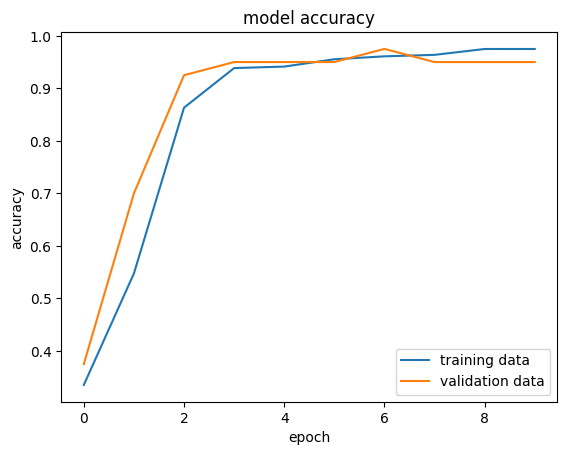

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

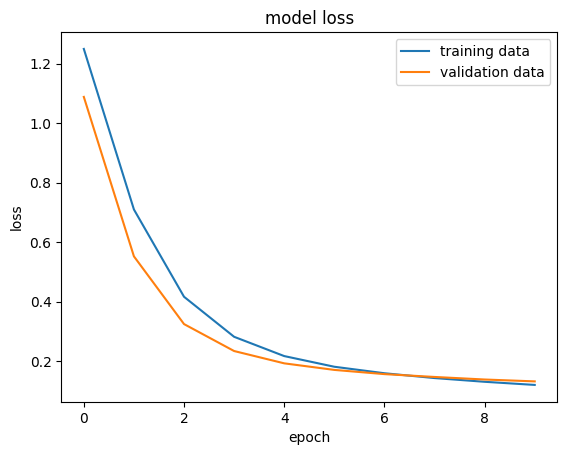

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)
print(loss)

6/6 [==============================] - 0s 2ms/step - loss: 0.1255 - accuracy: 0.9708
0.9707602262496948
0.1255272775888443


**Build a Predictive Model**


In [ ]:
print(X_test_std.shape)
print(X_test_std[0])

(171, 30)
[-0.03064165 -1.40905263 -0.04533245 -0.15159436  2.04738129 -0.11152619
  0.18520122  0.50694177  0.65972243  0.25993362  0.59991392  2.86518826
  0.7252122   0.15759611  0.97180277  0.38325056  0.58402977  2.91474791
 -0.39262883  0.71060836 -0.32717834 -1.69326148 -0.36711253 -0.38748116
  0.32463736 -0.76531515 -0.56583996 -0.18637835 -1.24009403 -0.63237194]


In [ ]:
Y_pred = model.predict(X_test_std)

6/6 [==============================] - 0s 1ms/step


In [ ]:
print(Y_pred.shape)
print(Y_pred[0])        #gives probability of data point on position 1 to be 0 or 1

(171, 2)
[0.4864492 0.5759529]


In [ ]:
print(Y_pred)           ##gives probability of all data points


[[0.4864492  0.5759529 ]
 [0.46735445 0.6202376 ]
 [0.29157674 0.9580006 ]
 [0.9989871  0.00929213]
 [0.32770994 0.48840803]
 [0.9881221  0.10672835]
 [0.4351144  0.74513906]
 [0.15960222 0.95750654]
 [0.18050107 0.9116509 ]
 [0.25524506 0.86236614]
 [0.6979181  0.69618535]
 [0.41839445 0.76343995]
 [0.51731    0.8013839 ]
 [0.33270708 0.82244337]
 [0.23590754 0.9137854 ]
 [0.9139748  0.16829138]
 [0.32415992 0.94248503]
 [0.13972366 0.8493669 ]
 [0.20067382 0.9613507 ]
 [0.9574679  0.16875874]
 [0.5916565  0.98701787]
 [0.24842106 0.93017805]
 [0.34403297 0.9566379 ]
 [0.11977325 0.9116388 ]
 [0.18162344 0.6638139 ]
 [0.94170386 0.12738906]
 [0.3233164  0.8335992 ]
 [0.31988332 0.6382648 ]
 [0.9353348  0.159295  ]
 [0.9657363  0.14382327]
 [0.3678868  0.685812  ]
 [0.17124756 0.8589201 ]
 [0.16317034 0.8529409 ]
 [0.99923736 0.04412822]
 [0.9809194  0.1554717 ]
 [0.4385858  0.84015983]
 [0.43765104 0.99296933]
 [0.41324064 0.8948113 ]
 [0.16700196 0.9475118 ]
 [0.20977266 0.8581238 ]


In [ ]:
my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [ ]:
#convert probabilities to class labels for all datapoints
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1]


In [ ]:
#use input from any data set site , I downloaded data.csv file from kaggle
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 15ms/step
[[0.42069316 0.9666512 ]]
[1]
The tumor is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
